In [1]:
pip install DeepForest --quiet

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.57.0 requires numpy<1.25,>=1.21, but you have numpy 1.26.4 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [15]:
##import libraries into environment

from deepforest import main
from deepforest import get_data
from deepforest import utilities
import matplotlib.pyplot as plt

In [2]:
#Bring a DeepForest pretrained model into environment

model = main.deepforest()
model.use_release()

Reading config file: /opt/conda/lib/python3.11/site-packages/deepforest/data/deepforest_config.yml


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


No validation file provided. Turning off validation loop


/opt/conda/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/logger_connector/logger_connector.py:75: Starting from v1.9.0, `tensorboardX` has been removed as a dependency of the `pytorch_lightning` package, due to potential conflicts with other packages in the ML ecosystem. For this reason, `logger=True` will use `CSVLogger` as the default logger, unless the `tensorboard` or `tensorboardX` packages are found. Please `pip install lightning[extra]` or one of them to enable TensorBoard support by default


Model from DeepForest release https://github.com/weecology/DeepForest/releases/tag/1.0.0 was already downloaded. Loading model from file.
Loading pre-built model: https://github.com/weecology/DeepForest/releases/tag/1.0.0


In [5]:
#Path for the image you want to ID trees. This a non-georeferenced single jpeg drone image. In this example, the image data is in Cyverse.
image_path = get_data("/data-store/iplant/home/shared/commons_repo/curated/Gillan_Ecosphere_2021/raw_images/May_2019/15-g2/100_0123/100_0123_0086.JPG")
image_path2 = get_data("/data-store/iplant/home/jgillan/media/DJI_0184.jpeg")
image_path3 = get_data("/data-store/iplant/home/jgillan/media/100_0407_0064.jpeg")
image_path4 = get_data("/data-store/iplant/home/jgillan/media/DJI_0468.jpeg")
image_path5 = get_data("/data-store/iplant/home/jgillan/media/101_0472_0074.jpeg")

In [6]:
#Identify and put bounding boxes around all trees in the image
trees = model.predict_image(path=image_path2, return_plot = False)
trees

xmin   ymin   xmax   ymax label     score     image_path
0   205.0  442.0  245.0  482.0  Tree  0.482140  DJI_0184.jpeg
1    64.0  347.0  102.0  384.0  Tree  0.456419  DJI_0184.jpeg
2     2.0  137.0   48.0  187.0  Tree  0.444820  DJI_0184.jpeg
3     1.0  332.0   42.0  377.0  Tree  0.438789  DJI_0184.jpeg
4   130.0  496.0  170.0  535.0  Tree  0.432619  DJI_0184.jpeg
..    ...    ...    ...    ...   ...       ...            ...
57  549.0   92.0  589.0  129.0  Tree  0.186831  DJI_0184.jpeg
58  130.0  335.0  171.0  376.0  Tree  0.186490  DJI_0184.jpeg
59   58.0  207.0  110.0  258.0  Tree  0.185045  DJI_0184.jpeg
60  206.0  138.0  248.0  180.0  Tree  0.180048  DJI_0184.jpeg
61  343.0  365.0  427.0  442.0  Tree  0.103841  DJI_0184.jpeg

[62 rows x 7 columns]

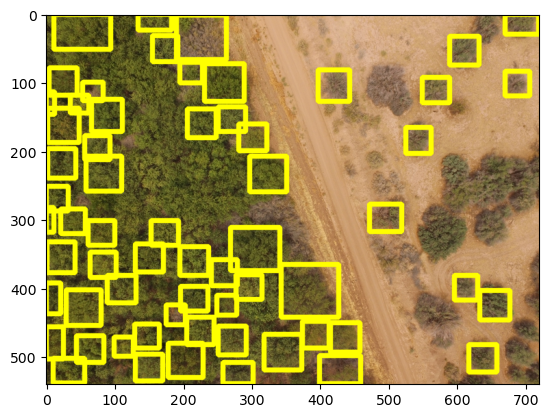

In [7]:
#Show the image with the bounding boxes
plot = model.predict_image(path=image_path2, return_plot = True, color=(0, 255, 255), thickness=5)

plt.imshow(plot[:,:,::-1])

In [3]:
raster_path = get_data("/data-store/iplant/home/shared/commons_repo/curated/Gillan_Ecosphere_2021/raster_products/May_2019/15_g2_products/15_g2_ortho.tif")

In [4]:
predicted_raster = model.predict_tile(raster_path, return_plot = True,patch_overlap=0.25, color=(0, 255, 255), thickness=5)

/opt/conda/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=127` in the `DataLoader` to improve performance.


Predicting: |          | 0/? [00:00<?, ?it/s]

/opt/conda/lib/python3.11/site-packages/pytorch_lightning/trainer/call.py:54: Detected KeyboardInterrupt, attempting graceful shutdown...


TypeError: 'NoneType' object is not iterable

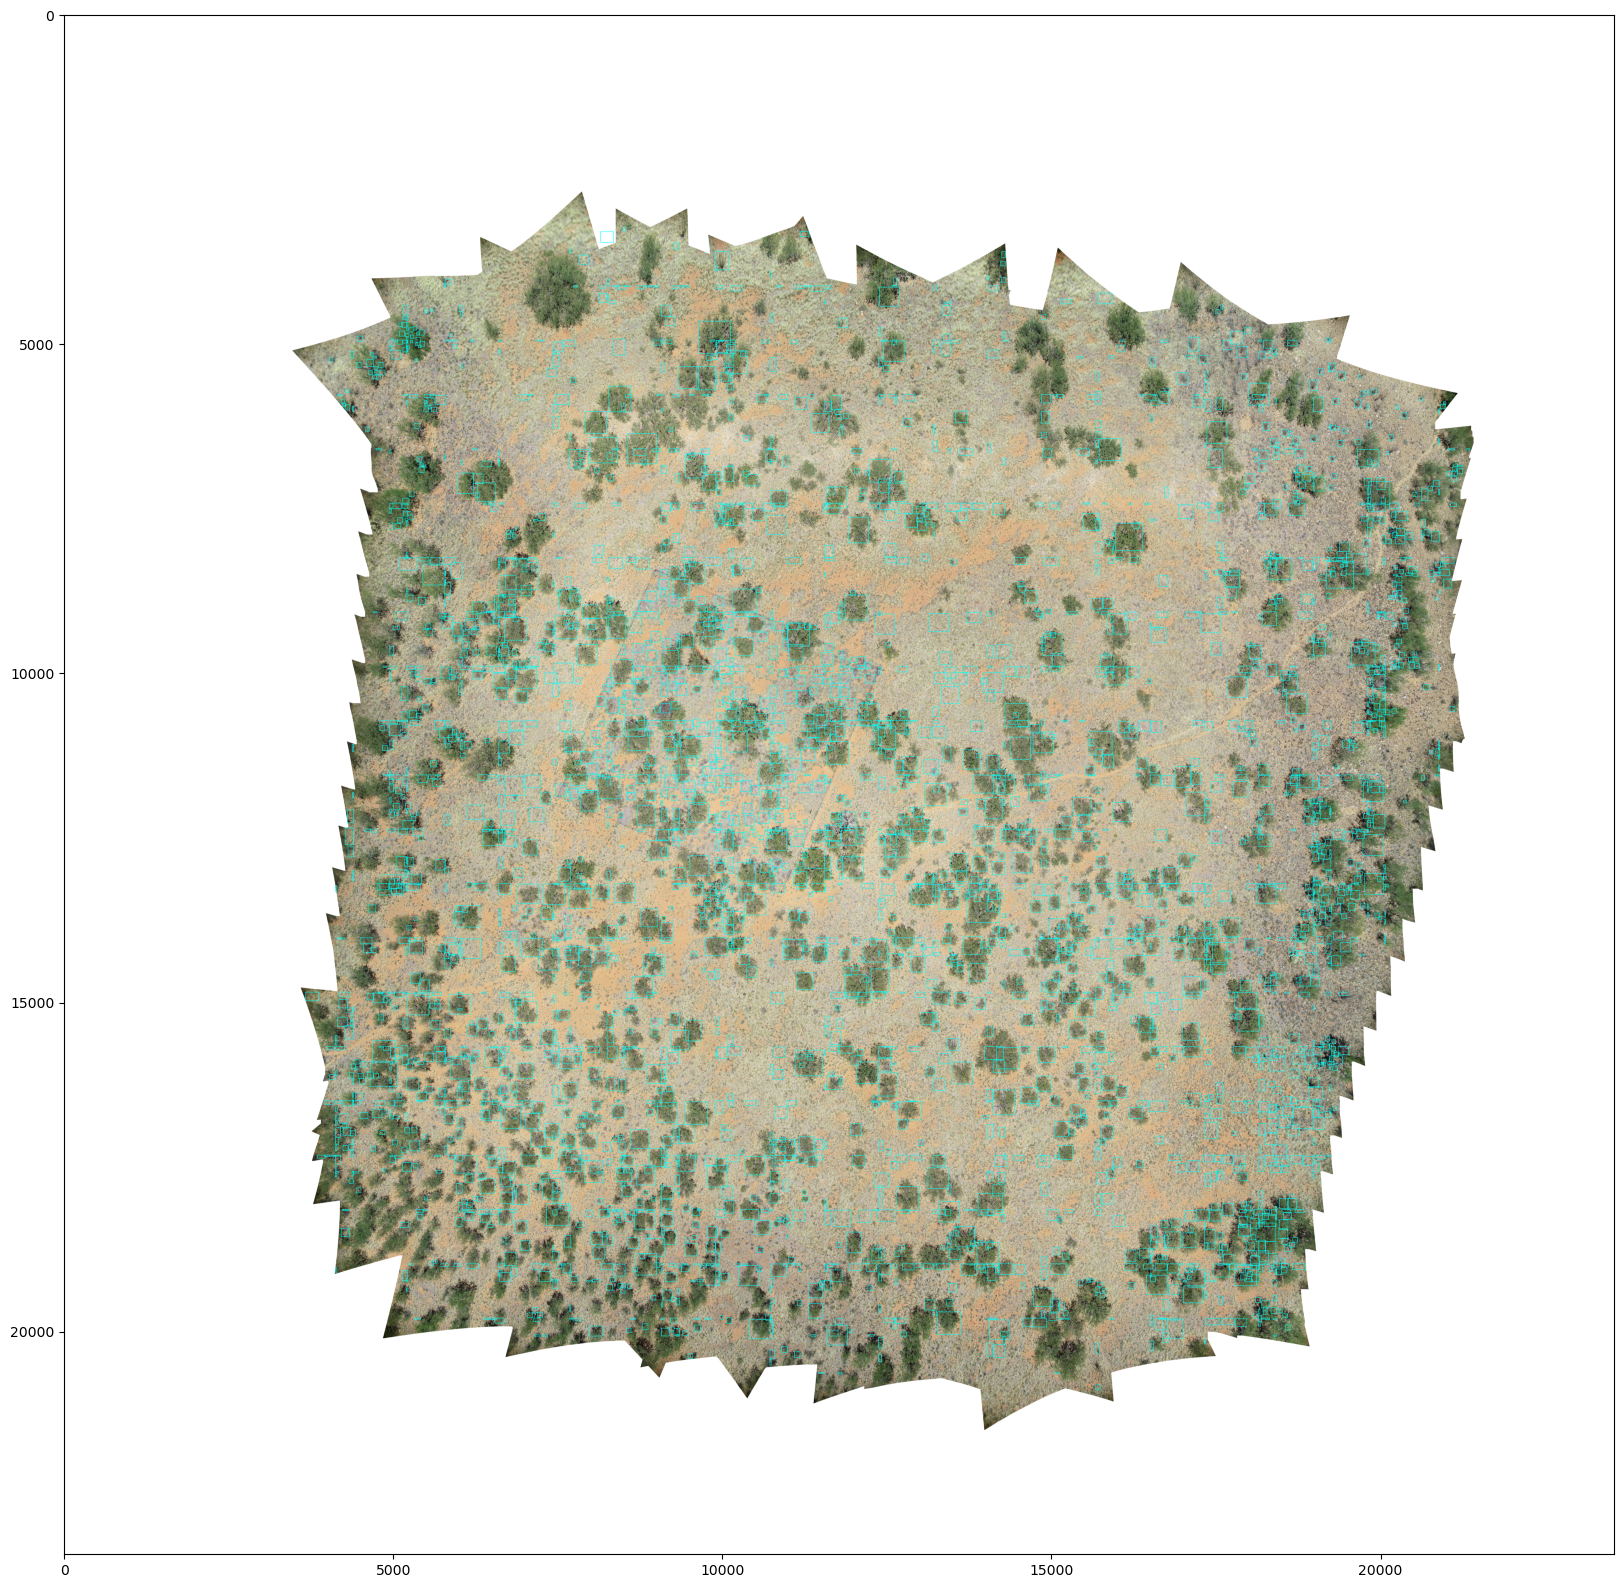

In [5]:
plt.figure(figsize=(20, 20))
plt.imshow(predicted_raster)
plt.show()

In [26]:
##Convert .shp to annoation

image_path = get_data("/data-store/iplant/home/shared/commons_repo/curated/Gillan_Ecosphere_2021/raw_images/May_2019/15-g2/100_0126/100_0126_0079.JPG")
shp_path = get_data("/data-store/iplant/home/jgillan/media/srer_tree.shp")
savedir = "/data-store/iplant/home/jgillan/media/labels.csv"

In [25]:
df = utilities.shapefile_to_annotations(
    shapefile="shp_path", 
    rgb="image_path",
    savedir = "savedir"
)

DriverError: shp_path: No such file or directory

In [19]:
shp_path

'/data-store/iplant/home/jgillan/media/srer_tree.shp'